<a href="https://colab.research.google.com/github/oceanfishYU/Python_practise/blob/main/NN(%E9%A1%9E%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF)10601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = blue>1.抓資料

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets  import mnist

從keras.datasets裡面抓出mnist的資料

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

從mnist裡讀取資料，x_train,y_train為訓練資料，x_test,y_test為預測資料

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train

x_train(訓練用的資料)為60000張28*28像素的圖片

In [ ]:
y_train.shape

(60000,)

y_train(訓練用的答案)為60000筆資料

In [ ]:
x_test.shape

(10000, 28, 28)

x_test(預測用的資料)為10000張28*28像素的圖片

In [ ]:
y_test.shape

(10000,)

y_train(預測用的答案)為10000筆資料

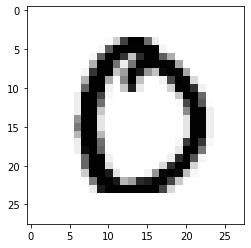

In [ ]:
plt.imshow(x_train[88],cmap='Greys')

把x_train的第88張顯示出來，然後cmap='Greys'是把圖片改為灰階的

In [ ]:
y_train[88]

0

x_train的第88張的答案就是y_train的第88筆資料，答案是0

#<font color = blue>2.修改輸出值(one-hot-encoding)

0 => [1 0 0 0 0 0 0 0 0 0]

1 => [0 1 0 0 0 0 0 0 0 0]

2 => [0 0 1 0 0 0 0 0 0 0]

....

9 => [0 0 0 0 0 0 0 0 0 1]

In [ ]:
from keras.utils.np_utils import to_categorical

從keras.utils.np_utils的程式內取出to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)

把y_train丟進to_categorical裡修改(每個數字都變成10個(000000001...))

In [ ]:
y_train.shape

(60000, 10)

y_train就會變成60000個裡面有10個值的二維陣列，原本的0~8被改成

0 => [1 0 0 0 0 0 0 0 0 0]

1 => [0 1 0 0 0 0 0 0 0 0]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

y_train裡面的資料就變成我們要的樣子了


#<font color = blue>3.建立深度學習模型

In [ ]:
from keras import models
from keras import layers

從keras裡面取出models和layers和layers兩個程式

In [ ]:
mymodel = models.Sequential()

讓mymodel等於models裡的Sequential這個模型(類神經網路)

In [ ]:
mymodel.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))

增加一層全連階層(Dense)，然後這個密集層有512個點，輸入的shape為28*28，activation(啟動函式)='relu'是為了破壞線性

In [ ]:
mymodel.add(layers.Dense(256,activation='relu'))

增加第二個全連接層，這層有256個點，然後除了第一層以外其他都不用寫input_shape

In [ ]:
mymodel.add(layers.Dense(10,activation='softmax'))

第三層為10個(輸出層)，啟動函式softmax是為了讓最後輸出的所有數值加起來等於1

In [ ]:
mymodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

compile函數把這些東西組起來定義損失函數(loss)(真實值和預測值要用甚麼東西去計算)=categorical_crossentropy和最佳化函數(optimizer)=adam，metrics是我們要他在運算時顯示甚麼東西=['accuracy']我們要它顯示正確率。

In [ ]:
x_train.reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
mymodel.fit(x_train.reshape(-1,28*28),y_train,epochs=10,batch_size=128)

訓練模型，x_train.reshape(-1,28*28)是因為我們要讓它等於一條一條(二維的，原本是三維)的資料才可以訓練，y_train之前已經改過了所以不用再改。batch_size=128是一次做128筆資料，y_train,epochs=10是全部要做10次。如果做完再做一次的話會是第11次、第12次...，就是說你在執行一次的話不是從頭訓練。

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


可以使用summary來看這個模型的結構

#<font color = blue>4.預測

In [ ]:
mypredict=mymodel.predict(x_test.reshape(-1,28*28))
mypredict

array([[3.3530816e-14, 4.4477022e-16, 7.9614995e-12, ..., 9.9999845e-01,
        2.9485724e-13, 1.3507303e-09],
       [4.8240925e-20, 1.7503460e-05, 9.9998248e-01, ..., 2.5461847e-20,
        1.9325164e-22, 2.4581213e-21],
       [2.1613799e-17, 9.9999976e-01, 3.7238879e-10, ..., 1.0908102e-09,
        1.7841981e-07, 3.3076830e-09],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8160826e-23,
        2.3634844e-32, 9.1680604e-21],
       [3.6392293e-28, 1.2461014e-31, 0.0000000e+00, ..., 1.3270353e-38,
        2.9147819e-20, 1.0514430e-37],
       [1.5654264e-15, 2.3568069e-22, 7.3546484e-19, ..., 6.0131110e-36,
        1.0864890e-21, 5.7610367e-38]], dtype=float32)

要預測的話要和訓練的時候一樣把資料變成一條一條的。

In [ ]:
y_test[1]

2

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
predict_class=np.argmax(mypredict,axis=1)
predict_class

array([7, 2, 1, ..., 4, 5, 6])


使用np.argmax在陣列中找到最大的值，最大的值就是預測的答案，軸度是1(拆掉最外面外內一層的括號)

In [ ]:
predict_class != y_test

array([False, False, False, ..., False, False, False])

預測的答案如果不等於y_test的就是True(1)

In [ ]:
np.nonzero(predict_class != y_test)

使用nonzero來找到預測與實際答案不符合的資料

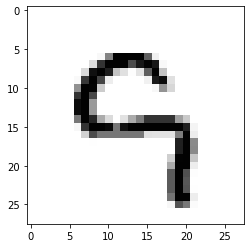

In [ ]:
plt.imshow(x_test[104],cmap='Greys')

In [ ]:
y_test[104]

9

In [ ]:
predict_class[104]

9

In [ ]:
1-np.count_nonzero(predict_class!=y_test)/10000

0.967

1減掉nonzero找到的預測與實際答案不符合的資料然後用.count算答案不一樣的個數再除以10000(錯誤的機率)，就能算出正確的機率。


In [ ]:
y_test=to_categorical(y_test)

要先把y_test改成我們要的形式

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
mymodel.evaluate(x_test.reshape(-1,28*28),y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1777 - accuracy: 0.9670


[0.17765897512435913, 0.9670000076293945]

使用.evaluate找到錯誤的機率與正確的機率。

#<font color = blue>5.模型的儲存

In [ ]:
from google.colab import drive 
import os 
drive.mount('/content/gdrive',force_remount=True)
os.chdir('/content/gdrive/MyDrive/AIclass/')

MessageError: ignored

先跟雲端硬碟連線

In [ ]:
mymodel.save('abc.h5')

然後把mymodel儲存到雲端硬碟並取名為abc.h5